<img src="../img/GTK_Logo_Social Icon.jpg" width=175 align="right" />

#  Worksheet 5.4: Automate it All! - Answers
This worksheet covers concepts relating to automating a machine learning model using the techniques we learned.  It should take no more than 20-30 minutes to complete.  Please raise your hand if you get stuck.  

In [1]:
# Load Libraries - Make sure to run this cell!
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tpot import TPOTClassifier

## Step One:  Import the Data
In this example, we're going to use the dataset we used in worksheet 5.3.  Run the following code to read in the data, extract the features and target vector.

In [2]:
df = pd.read_csv('../data/dga_features_final_df.csv')
target = df['isDGA']
feature_matrix = df.drop(['isDGA'], axis=1)

Next, perform the test/train split in the conventional manner.

In [3]:
feature_matrix_train, feature_matrix_test, target_train, target_test = train_test_split(feature_matrix, 
                                                                                        target, 
                                                                                        test_size=0.25)

## Step Two:  Run the Optimizer
In the next step, use TPOT to create a classification pipeline using the DGA data set that we have been using.  The `TPOTClassifier()` has many configuration options and in the interest of time, please set the following variables when you instantiate the classifier.

* `max_time_mins`:  In the interests of time, set this to some number < 5.
* `max_eval_time_mins`:  This is another time limiting parameter which controls the amount of time for each iteration.  Default is 60*5.
* `n_jobs`:  The number of cores to use.


**Note:  This step will take some time, so you might want to get some coffee or a snack when it is running.**  While this is running take a look at the other configuration options available here: https://epistasislab.github.io/tpot/latest/.

In [4]:
# Your code here... 
clf = TPOTClassifier(max_time_mins=1)
clf.fit(feature_matrix_train, target_train)

Generation: : 2it [01:57, 58.58s/it]


,search_space,<tpot.search_...t 0x3242159d0>
,scorers,['roc_auc_ovr']
,scorers_weights,[1]
,cv,10
,other_objective_functions,[]
,other_objective_functions_weights,[]
,objective_function_names,None
,bigger_is_better,True
,categorical_features,None
,memory,None
,preprocessing,False


ConfusionMatrixDisplay.from_predictions(target_test, predictions)## Step Three:  Evaluate the Performance
Now that you have a trained model, the next step is to evaluate the performance and see how TPOT did in comparison with earlier models we created.  Use the techniques you've learned to evaluate the performance of your model.  Specifically, print out the `classification report` and a confusion matrix. 

Unfortunately, Yellowbrick will not work in this instance, however, you can generate a similar visual confusion matrix with the following code:

```
from sklearn.metrics import ConfusionMatrixDisplayt
ConfusionMatrixDisplay.from_predictions(target_test, predictions)

```

What is the accuracy of your model?  Is it significantly better than what you did in earlier labs?

In [5]:
predictions = clf.predict(feature_matrix_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [6]:
print(classification_report(predictions, target_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       267
           1       0.86      0.93      0.89       233

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



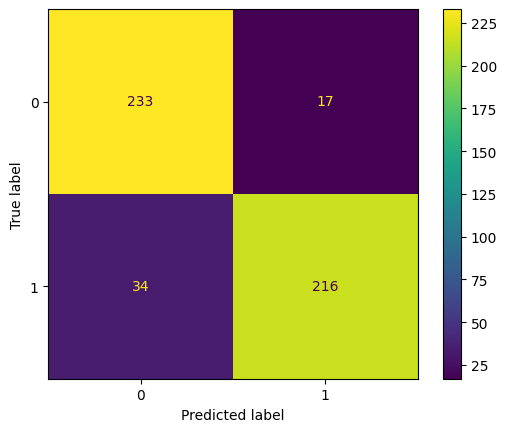

In [7]:
ConfusionMatrixDisplay.from_predictions(target_test, predictions)

## Step 4:  Export your Pipeline
If you are happy with the results from `TPOT` you can export the pipeline as a pickle with the code below:

```python
best_pipeline = clf.fitted_pipeline_

# Make predictions
best_pipeline.predict(data)

# Save the pipeline
with open("best_pipeline.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)

# Load the pipeline
with open("best_pipeline.pkl", "rb") as f:
    my_loaded_best_pipeline = pickle.load(f)
```


In [20]:
clf.fitted_pipeline_

,steps,"[('passthrough-1', ...), ('passthrough-2', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformer_list,"[('featureunion', ...), ('passthrough', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,columns,'auto'
,drop,None
